Nama : Az - Zahra Chikal E

NIM  : 1103213039

Kelas: TK-45-05

In [1]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('CitarumWater.csv')
df

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.570000,25.55°C,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.690000,25.55°C,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.390000,25.55°C,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.490000,25.55°C,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.170000,25.55°C,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,11/2/2022,6.030091,25.55°C,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1
2496,2497,Citarum,Wangisagara,11/3/2022,6.176031,25.55°C,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2
2497,2498,Citarum,Koyod,11/4/2022,7.776482,25.55°C,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2
2498,2499,Citarum,Setelah IPAL Cisirung,11/5/2022,7.047090,25.55°C,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


In [4]:
df=df.drop(columns=['O2'])

In [5]:
# Menghapus kolom yang tidak relevan
df.drop(columns=['No'])
#Menghapus tanda °C pada kolom temperatur
df['Temp'] = df['Temp'].str.replace('°C', '').astype(float)


In [6]:
#Pada kolom Temp sudah tidak terdapat tanda °C
df.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,2.44,2


In [7]:
X = df.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Class'])
y = df['Class']  # Kolom 'Class' adalah labely = df['Class']  # Kolom 'Class' adalah label

In [8]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Melakukan normalisasi/standarisasi pada fitur agar skala antar fitur seragam
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fitting scaler pada data latih
X_test_scaled = scaler.transform(X_test)  # Menggunakan scaler yang sudah dipelajari pada data uji


In [10]:
# Inisialisasi model Logistic Regression
logreg = LogisticRegression()

# Melatih model menggunakan data latih
logreg.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = logreg.predict(X_test_scaled)

# Menghitung probabilitas prediksi untuk keperluan ROC-AUC
# Modified Line: Get probabilities for all classes
y_pred_proba = logreg.predict_proba(X_test_scaled) 

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

Akurasi: 0.9627
Presisi: 0.9263
Recall: 0.8508
F1 Score: 0.8753
ROC-AUC Score: 0.9980


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


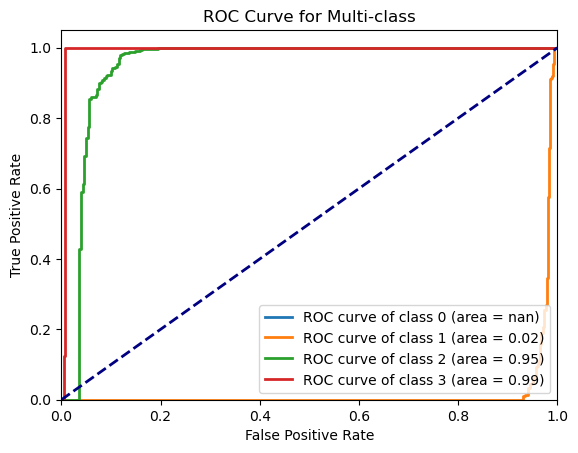

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Compute ROC curve and ROC area for each class
n_classes = y_pred_proba.shape[1] # Get number of classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i) # Calculate for each class individually
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-class")
plt.legend(loc="lower right")
plt.show()